In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-costs/medical_costs.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/medical-costs/medical_costs.csv')
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [4]:
df.tail()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
9995,24,female,26.9,2,yes,southeast,16551.53
9996,49,female,33.4,3,no,northeast,6376.05
9997,52,female,38.1,5,yes,northwest,18760.27
9998,24,male,33.4,4,no,northwest,5471.91
9999,24,female,21.7,5,no,southwest,4952.24


In [5]:
df.transpose

<bound method DataFrame.transpose of       Age     Sex   BMI  Children Smoker     Region  Medical Cost
0      58    male  15.6         2    yes  northwest      17907.54
1      24    male  29.8         0    yes  northeast      16312.64
2      50    male  29.0         5     no  northwest       6819.21
3      35    male  34.0         1     no  southeast       5247.87
4      31  female  17.6         3    yes  southeast      17525.49
...   ...     ...   ...       ...    ...        ...           ...
9995   24  female  26.9         2    yes  southeast      16551.53
9996   49  female  33.4         3     no  northeast       6376.05
9997   52  female  38.1         5    yes  northwest      18760.27
9998   24    male  33.4         4     no  northwest       5471.91
9999   24  female  21.7         5     no  southwest       4952.24

[10000 rows x 7 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [7]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Medical Cost'], dtype='object')

In [8]:
df.shape,df.size

((10000, 7), 70000)

In [9]:
df.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


# Data cleaning :- 



# Handling Missing Values:
1. Identifying: Use df.isnull() or df.isna() to find missing values (represented as NaN or None).
Dropping: df.dropna() removes rows or columns containing missing values.

2. Filling: df.fillna() replaces missing values with a specified value (e.g., 0, mean, median, or using forward/backward fill).

# Removing Duplicates:
1. Identifying: df.duplicated() returns a boolean Series indicating duplicate rows.

2. Dropping: df.drop_duplicates() removes duplicate rows, optionally based on specific columns using the subset argument.

# Correcting Data Types:
1. df.astype() converts columns to a specific data type (e.g., int, float, datetime).

# Cleaning Text Data:
String methods like str.strip(), str.lower(), str.upper(), str.replace(), and str.contains() are used to standardize and clean text entries.

# Renaming Columns:
df.rename() changes column names for clarity and consistency.

# Addressing Inconsistent Data:

1. df.replace() substitutes specific values with others.

2. Conditional selection and apply() can be used to correct inconsistencies based on custom logic.

# Outlier Handling:
While not a direct "cleaning" function, Pandas enables the identification and potential removal or transformation of outliers using statistical methods or filtering.

In [10]:
# Handling Missing Values: 
df.isnull()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64

In [12]:
df.loc[7, 'Age'] = None

In [13]:
df.isnull().sum()/df.shape[0]

Age             0.0001
Sex             0.0000
BMI             0.0000
Children        0.0000
Smoker          0.0000
Region          0.0000
Medical Cost    0.0000
dtype: float64

In [14]:
df.dropna()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58.0,male,15.6,2,yes,northwest,17907.54
1,24.0,male,29.8,0,yes,northeast,16312.64
2,50.0,male,29.0,5,no,northwest,6819.21
3,35.0,male,34.0,1,no,southeast,5247.87
4,31.0,female,17.6,3,yes,southeast,17525.49
...,...,...,...,...,...,...,...
9995,24.0,female,26.9,2,yes,southeast,16551.53
9996,49.0,female,33.4,3,no,northeast,6376.05
9997,52.0,female,38.1,5,yes,northwest,18760.27
9998,24.0,male,33.4,4,no,northwest,5471.91


In [15]:
# df['Age'].fillna(df['Age'].median(),inplace=True)
# replace missing values with median
df['Age'].fillna(value=df['Age'].median(), inplace=True)

/tmp/ipykernel_36/4061761452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=df['Age'].median(), inplace=True)


In [16]:
df['Medical Cost'].fillna(df['Medical Cost'].median())

0       17907.54
1       16312.64
2        6819.21
3        5247.87
4       17525.49
          ...   
9995    16551.53
9996     6376.05
9997    18760.27
9998     5471.91
9999     4952.24
Name: Medical Cost, Length: 10000, dtype: float64

In [17]:
x = df["Region"].mode()[0]

df.fillna({"Region": x}, inplace=True)

In [18]:
x = df["BMI"].median()

df.fillna({"BMI": x}, inplace=True)

In [19]:
for x in df.index:
  if df.loc[x, "Age"] > 80:
    df.drop(x, inplace = True)

# Removing Duplicates:

In [20]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58.0,male,15.6,2,yes,northwest,17907.54
1,24.0,male,29.8,0,yes,northeast,16312.64
2,50.0,male,29.0,5,no,northwest,6819.21
3,35.0,male,34.0,1,no,southeast,5247.87
4,31.0,female,17.6,3,yes,southeast,17525.49


In [21]:
print("Original DataFrame:\n", df.to_string(index=False))

Original DataFrame:
  Age    Sex  BMI  Children Smoker    Region  Medical Cost
58.0   male 15.6         2    yes northwest      17907.54
24.0   male 29.8         0    yes northeast      16312.64
50.0   male 29.0         5     no northwest       6819.21
35.0   male 34.0         1     no southeast       5247.87
31.0 female 17.6         3    yes southeast      17525.49
56.0 female 35.2         5     no northeast       7829.12
42.0   male 28.8         5     no northwest       6668.57
42.0   male 34.3         0    yes northeast      16409.13
47.0 female 19.1         2    yes southeast      18024.82
61.0   male 30.2         1    yes northwest      18618.26
35.0   male 32.1         0    yes northeast      17518.05
43.0 female 16.7         4     no northwest       6106.44
43.0 female 18.6         1    yes southeast      17655.01
45.0 female 24.0         1     no northeast       5925.78
25.0   male 30.7         5     no northeast       5555.77
56.0 female 28.2         4    yes northeast      19

In [22]:
# detect duplicates
print("\nDuplicate Rows:\n", df[df.duplicated()].to_string(index=False))


Duplicate Rows:
 Empty DataFrame
Columns: [Age, Sex, BMI, Children, Smoker, Region, Medical Cost]
Index: []


In [23]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58.0,male,15.6,2,yes,northwest,17907.54
1,24.0,male,29.8,0,yes,northeast,16312.64
2,50.0,male,29.0,5,no,northwest,6819.21
3,35.0,male,34.0,1,no,southeast,5247.87
4,31.0,female,17.6,3,yes,southeast,17525.49


In [24]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [25]:
df.duplicated().sum()

0

In [26]:
df['BMI'].drop_duplicates(inplace=True)

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# remove duplicates based on column 'A'
# df.drop_duplicates(subset=['Sex'], keep='first', inplace=True)

In [29]:
print("\nDataFrame after removing duplicates based on column 'A':\n", df.to_string(index=False))


DataFrame after removing duplicates based on column 'A':
  Age    Sex  BMI  Children Smoker    Region  Medical Cost
58.0   male 15.6         2    yes northwest      17907.54
24.0   male 29.8         0    yes northeast      16312.64
50.0   male 29.0         5     no northwest       6819.21
35.0   male 34.0         1     no southeast       5247.87
31.0 female 17.6         3    yes southeast      17525.49
56.0 female 35.2         5     no northeast       7829.12
42.0   male 28.8         5     no northwest       6668.57
42.0   male 34.3         0    yes northeast      16409.13
47.0 female 19.1         2    yes southeast      18024.82
61.0   male 30.2         1    yes northwest      18618.26
35.0   male 32.1         0    yes northeast      17518.05
43.0 female 16.7         4     no northwest       6106.44
43.0 female 18.6         1    yes southeast      17655.01
45.0 female 24.0         1     no northeast       5925.78
25.0   male 30.7         5     no northeast       5555.77
56.0 female 2

In [30]:
df.isnull().sum()

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64

In [31]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58.0,male,15.6,2,yes,northwest,17907.54
1,24.0,male,29.8,0,yes,northeast,16312.64
2,50.0,male,29.0,5,no,northwest,6819.21
3,35.0,male,34.0,1,no,southeast,5247.87
4,31.0,female,17.6,3,yes,southeast,17525.49


In [32]:
df.shape

(10000, 7)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  float64
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 547.0+ KB


In [34]:
# Correcting Data Types

df['Age'] = df['Age'].astype('int32')
df['Children'] = df['Children'].astype('int32')
# df['BMI'] = df['BMI'].astype("float32")

In [35]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


# Cleaning Text Data

In [36]:
df['Sex'] = df['Sex'].apply(lambda x: x[0].upper() + x[1:].lower())

In [37]:
df['Smoker'] = df['Smoker'].apply(lambda x: x[0].upper() + x[1:].lower())
df['Region'] = df['Region'].apply(lambda x: x[0].upper() + x[1:].lower())

In [38]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,Male,15.6,2,Yes,Northwest,17907.54
1,24,Male,29.8,0,Yes,Northeast,16312.64
2,50,Male,29.0,5,No,Northwest,6819.21
3,35,Male,34.0,1,No,Southeast,5247.87
4,31,Female,17.6,3,Yes,Southeast,17525.49


# Renaming Columns:- 

In [39]:
df.rename(columns={'Medical Cost':'Medical_Cost'},inplace=True)

In [40]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical_Cost
0,58,Male,15.6,2,Yes,Northwest,17907.54
1,24,Male,29.8,0,Yes,Northeast,16312.64
2,50,Male,29.0,5,No,Northwest,6819.21
3,35,Male,34.0,1,No,Southeast,5247.87
4,31,Female,17.6,3,Yes,Southeast,17525.49


In [41]:
dummies = pd.get_dummies(df['Sex'], drop_first=True)

df = pd.concat([df,dummies],axis=1)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical_Cost,Male
0,58,Male,15.6,2,Yes,Northwest,17907.54,True
1,24,Male,29.8,0,Yes,Northeast,16312.64,True
2,50,Male,29.0,5,No,Northwest,6819.21,True
3,35,Male,34.0,1,No,Southeast,5247.87,True
4,31,Female,17.6,3,Yes,Southeast,17525.49,False


# transfor data:- 

In [42]:
df['Region'].value_counts()

Region
Southwest    2521
Northeast    2514
Northwest    2486
Southeast    2479
Name: count, dtype: int64

In [43]:
df['Sex'] = pd.Categorical(df['Sex']).codes # male => 1 , female => 0 

In [44]:
df['Smoker'] = pd.Categorical(df['Smoker']).codes   # smoker => yes => 1 other 0 
df['Region'] = pd.Categorical(df['Region']).codes

# Northeast => 0 , Northwest => 1 , Southeast => 2 , Southwest => 3 

In [45]:
df['Region'].value_counts()

Region
3    2521
0    2514
1    2486
2    2479
Name: count, dtype: int64

In [46]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical_Cost,Male
0,58,1,15.6,2,1,1,17907.54,True
1,24,1,29.8,0,1,0,16312.64,True
2,50,1,29.0,5,0,1,6819.21,True
3,35,1,34.0,1,0,2,5247.87,True
4,31,0,17.6,3,1,2,17525.49,False


In [47]:
df.shape

(10000, 8)

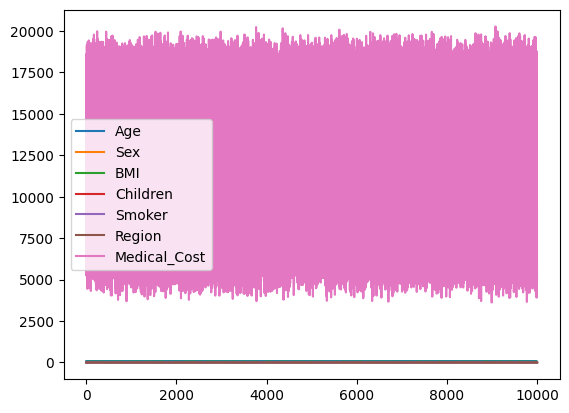

In [48]:
df.plot()

plt.show()

In [49]:
df.groupby(['Sex','Smoker'])['Medical_Cost'].agg(['mean','sum','median'])

mean          sum     median
Sex Smoker                                      
0   0        5894.080696  14817718.87   5917.325
    1       17926.999119  45176037.78  17950.565
1   0        5895.635706  14703715.45   5899.585
    1       17917.415073  44291850.06  17921.365

In [50]:
new_df = df.groupby(['Age'])['Medical_Cost'].agg(['mean','sum','median'])
new_df

,mean,sum,median
Age,,,
18,10125.988841,2096079.69,5312.930
19,10827.987619,2273877.40,15781.390
20,10771.307447,2025005.80,5959.800
21,10721.503191,2015642.60,5913.475
22,10608.050960,2100394.09,5848.210
23,11341.695708,2642615.10,16226.660
24,11138.083729,2628587.76,16178.185
25,10581.576096,1978754.73,5713.320
26,10196.193268,2090219.62,5751.530


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: ylabel='Count'>

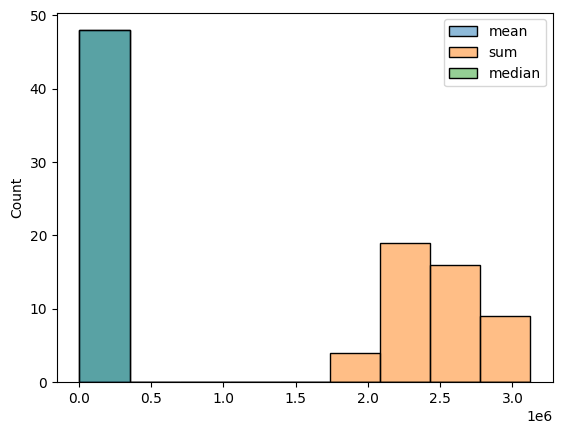

In [51]:
sns.histplot(new_df)

# Remove Outliers:- 

# Z-score , IQR and Normalization data 

In [52]:
df.describe()

,Age,Sex,BMI,Children,Smoker,Region,Medical_Cost
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.680600,0.496600,27.40301,2.501700,0.499200,1.500700,11898.932216
std,13.806022,0.500013,7.22896,1.701672,0.500024,1.121216,6073.875834
min,18.000000,0.000000,15.00000,0.000000,0.000000,0.000000,3617.090000
25%,30.000000,0.000000,21.10000,1.000000,0.000000,0.000000,5909.925000
50%,42.000000,0.000000,27.40000,2.000000,0.000000,1.500000,7957.430000
75%,54.000000,1.000000,33.70000,4.000000,1.000000,3.000000,17931.962500
max,65.000000,1.000000,40.00000,5.000000,1.000000,3.000000,20268.210000


<Axes: >

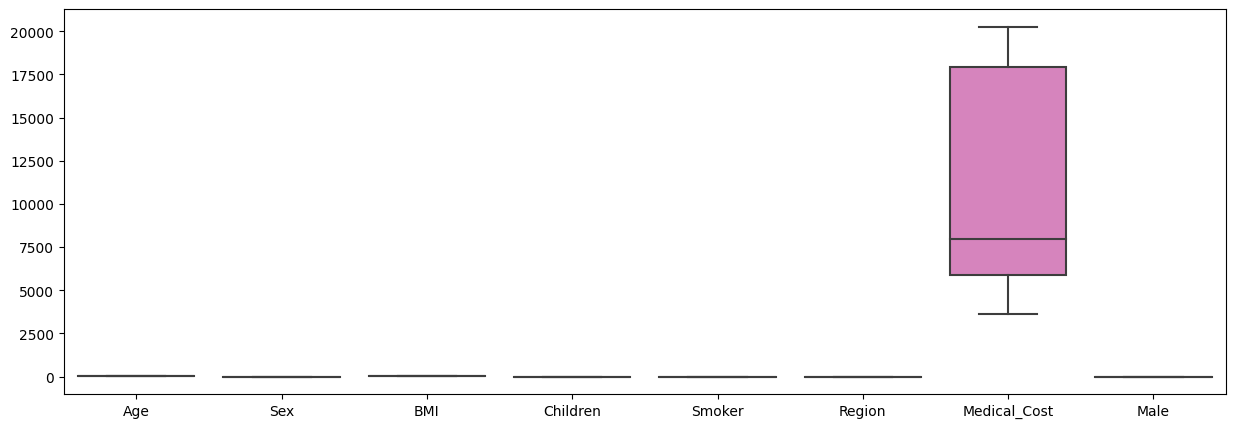

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

<Axes: >

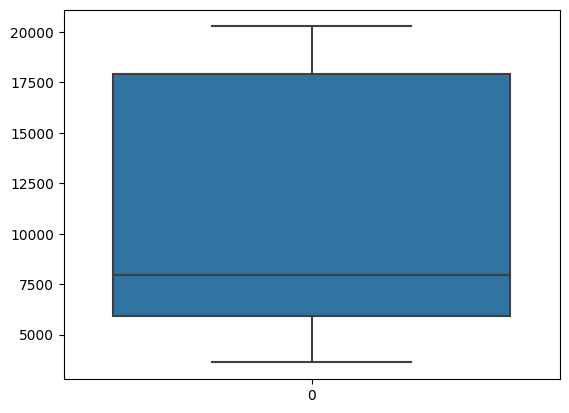

In [54]:
sns.boxplot(df['Medical_Cost'])

/tmp/ipykernel_36/3405353597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Medical_Cost'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Medical_Cost', ylabel='Density'>

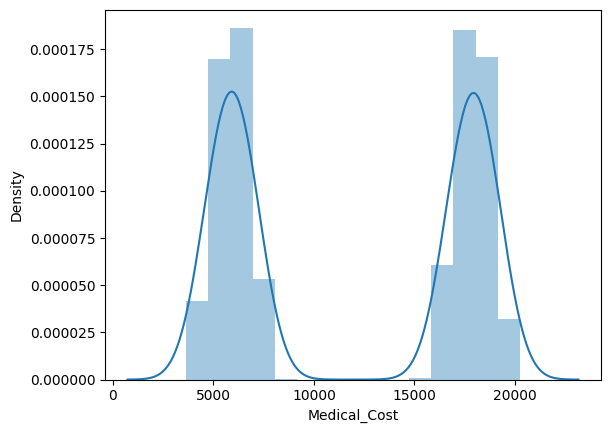

In [55]:
sns.distplot(df['Medical_Cost'])

/tmp/ipykernel_36/4107119561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Density'>

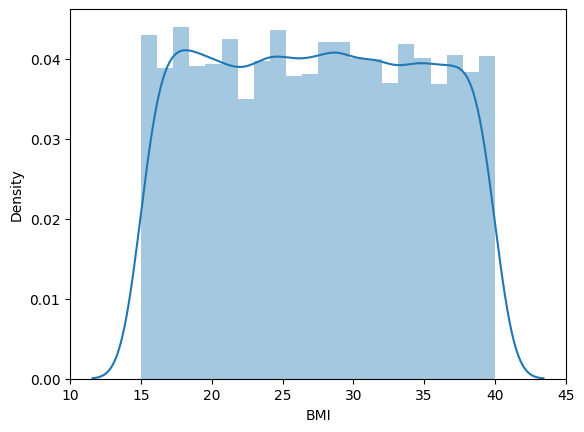

In [56]:
sns.distplot(df['BMI'])

<Axes: >

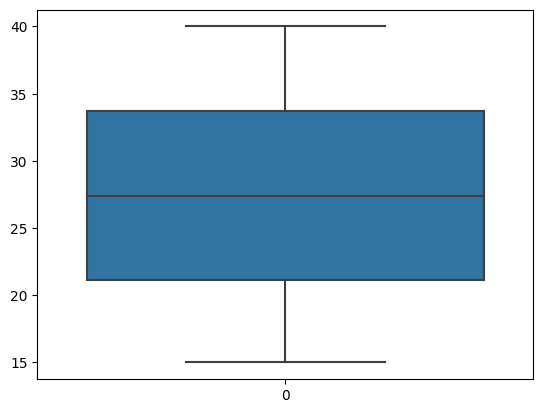

In [57]:
sns.boxplot(df['BMI'])

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


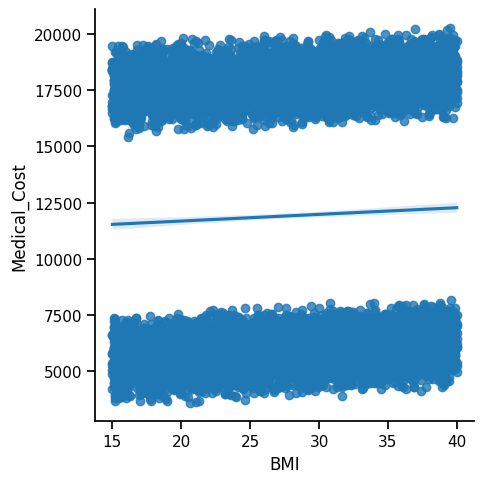

In [58]:
sns.set_context('notebook')
sns.lmplot(x = 'BMI',y='Medical_Cost',data = df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Medical_Cost'>

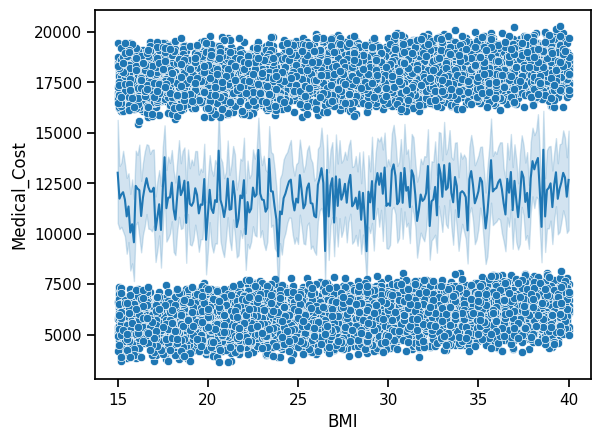

In [59]:
sns.scatterplot(x='BMI',y='Medical_Cost',data = df)
sns.lineplot(x='BMI',y='Medical_Cost',data = df)

In [60]:
df['Sex'].value_counts()

Sex
0    5034
1    4966
Name: count, dtype: int64

[Text(0, 0, '5034'), Text(0, 0, '4966')]


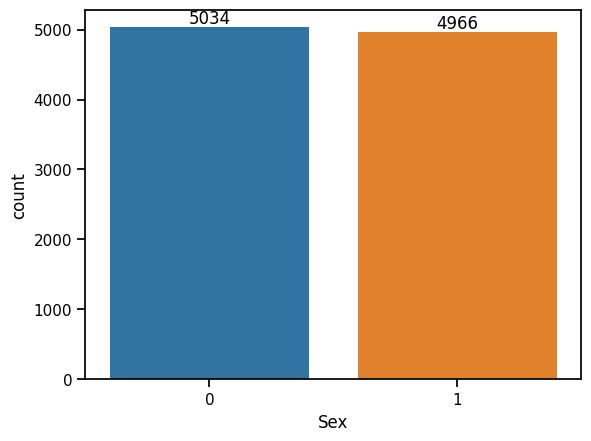

In [61]:
x = sns.countplot(x=df['Sex'])
for i in x.containers:
    print(x.bar_label(i))

/tmp/ipykernel_36/2721253944.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Sex', y='Medical_Cost', data=df, estimator=sum, ci=None)


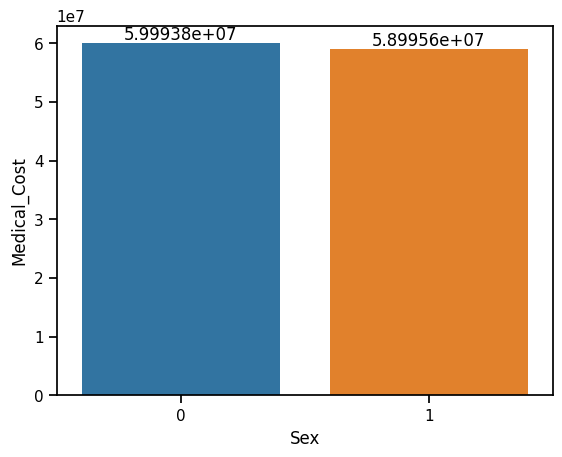

In [62]:
ax = sns.barplot(x='Sex', y='Medical_Cost', data=df, estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [63]:
import random
# 🔵 Dynamic color generator
def get_random_colors(n):
    return ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(n)]

In [64]:
def customized(column):
    sizes = column.value_counts()
    labels = sizes.index

    colors = get_random_colors(len(labels))

    # 🟢 Explode (highlight) one section
    explode = [0.1 if i == max(sizes) else 0.05 for i in sizes]  # explode the largest
    
    return sizes,labels,colors , explode

customized(df["Sex"])

(Sex
 0    5034
 1    4966
 Name: count, dtype: int64,
 Index([0, 1], dtype='int8', name='Sex'),
 ['#0BAA0D', '#7042AD'],
 [0.1, 0.05])

In [65]:
sizes,labels,colors ,explode = customized(df["Sex"])

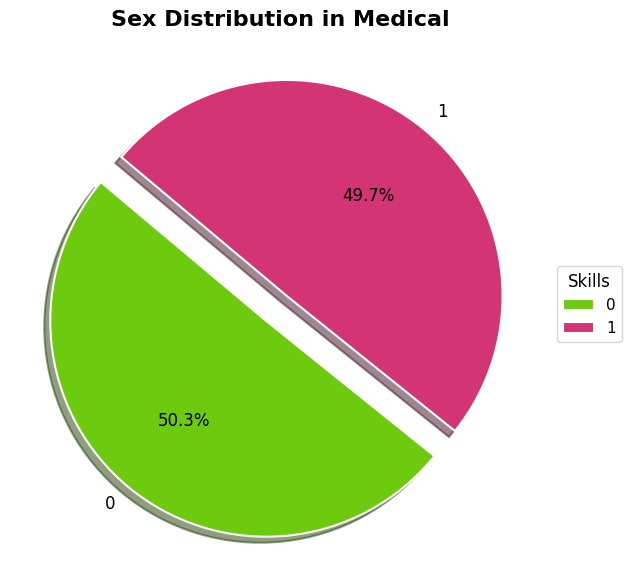

In [66]:
# Create Pie Chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# 🔷 Legend
plt.legend(wedges, labels, title="Skills", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 🔶 Title
plt.title("Sex Distribution in Medical", fontsize=16, weight='bold')

# ⚪ Draw circle for donut effect (optional)
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

| Feature          | Description                                        |
| ---------------- | -------------------------------------------------- |
| `dynamic colors` | Random hex codes for each slice                    |
| `explode`        | Highlights the largest slice                       |
| `shadow`         | Adds depth to the chart                            |
| `legend`         | Added with labels on the side                      |
| `autopct`        | Shows percentage on chart                          |
| `title`          | Bold, centered title                               |
| `wedgeprops`     | Adds border to each slice                          |
| `donut option`   | Optional: turn pie into donut using `plt.Circle()` |


In [67]:
df[df['Sex']==0]['Sex'].value_counts() , df[df['Sex']==1]['Sex'].value_counts()

(Sex
 0    5034
 Name: count, dtype: int64,
 Sex
 1    4966
 Name: count, dtype: int64)

In [68]:
# Female
df[df['Sex']==0]['Sex'].value_counts()/df.shape[0] * 100

Sex
0    50.34
Name: count, dtype: float64

In [69]:
# MaLE 
df[df['Sex']==1]['Sex'].value_counts()/df.shape[0] * 100

Sex
1    49.66
Name: count, dtype: float64

<Axes: xlabel='Sex', ylabel='Medical_Cost'>

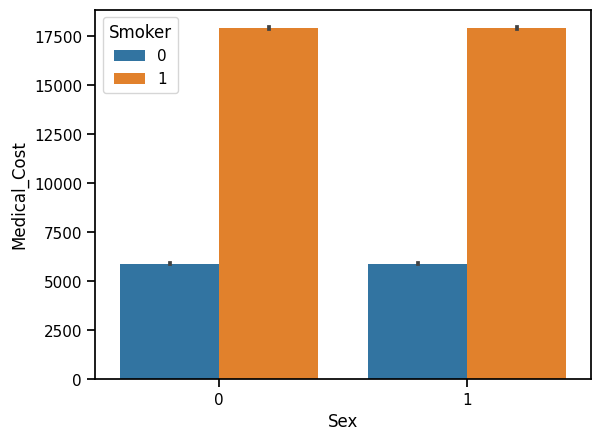

In [85]:
sns.barplot(x = df["Sex"] , y =df['Medical_Cost'],hue=df['Smoker']) 

# "Whenever they smoke, their medical cost is significantly higher."
# "Smoking is associated with significantly higher medical costs.

<Axes: xlabel='Sex', ylabel='BMI'>

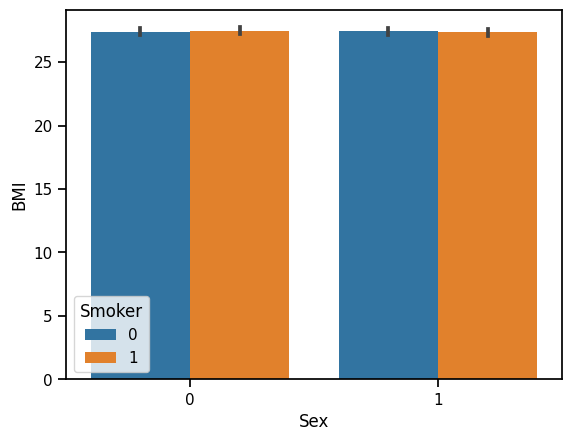

In [84]:
sns.barplot(x = df["Sex"] , y =df['BMI'],hue=df['Smoker']) 

In [71]:
n_ = df.groupby('Sex')['Medical_Cost'].agg(['max','min','mean','median','sum'])
n_

,max,min,mean,median,sum
Sex,,,,,
0,20234.32,3653.50,11917.710896,15781.39,59993756.65
1,20268.21,3617.09,11879.896398,7793.61,58995565.51


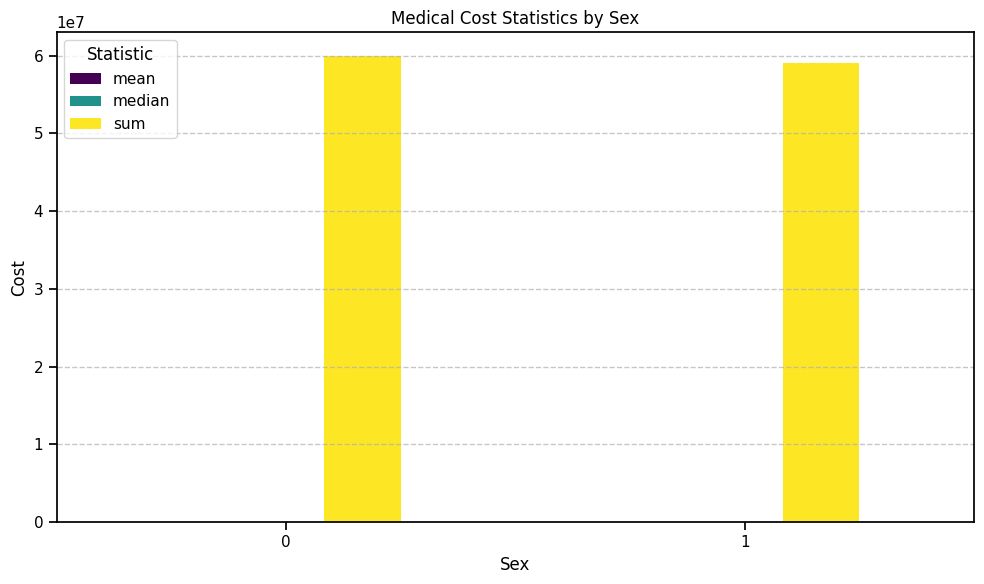

In [72]:
# Plot mean, median, and sum
n_[['mean', 'median', 'sum']].plot(kind='bar', figsize=(10,6), colormap='viridis')

plt.title('Medical Cost Statistics by Sex')
plt.ylabel('Cost')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

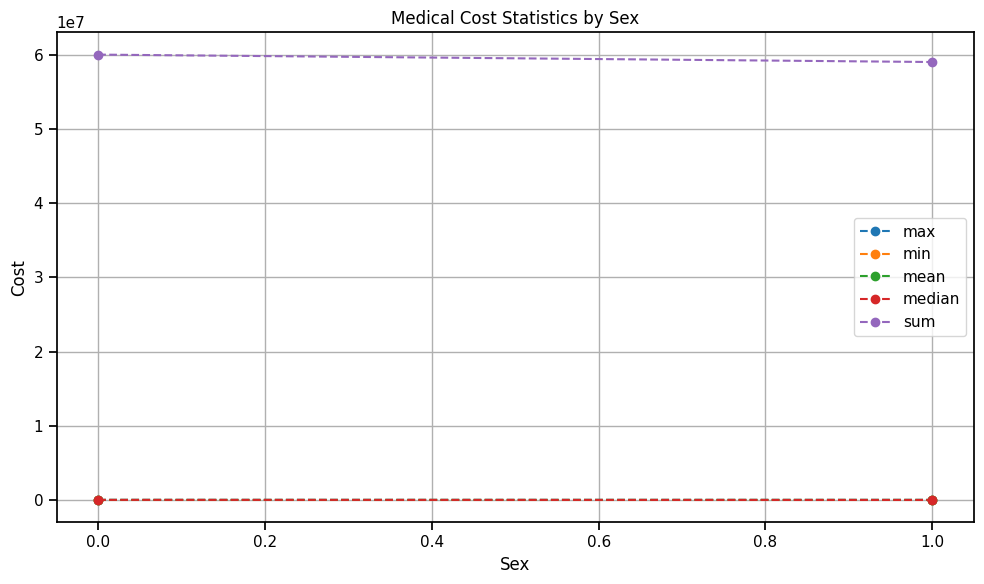

In [73]:
n_.plot(kind='line', marker='o', figsize=(10,6), linestyle='--')

plt.title('Medical Cost Statistics by Sex')
plt.ylabel('Cost')
plt.xlabel('Sex')
plt.grid(True)
plt.tight_layout()
plt.show()


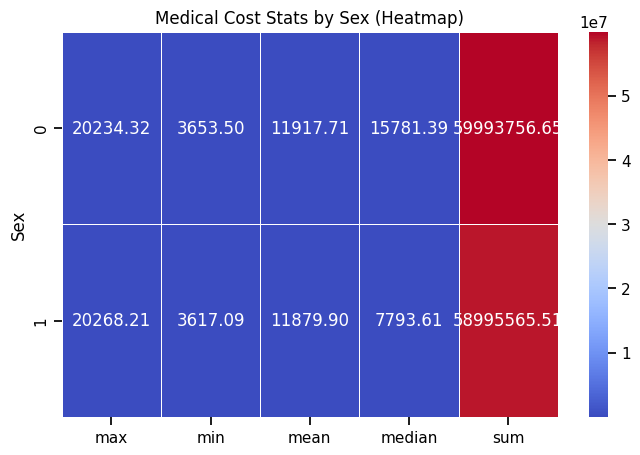

In [74]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(n_, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Medical Cost Stats by Sex (Heatmap)')
plt.show()

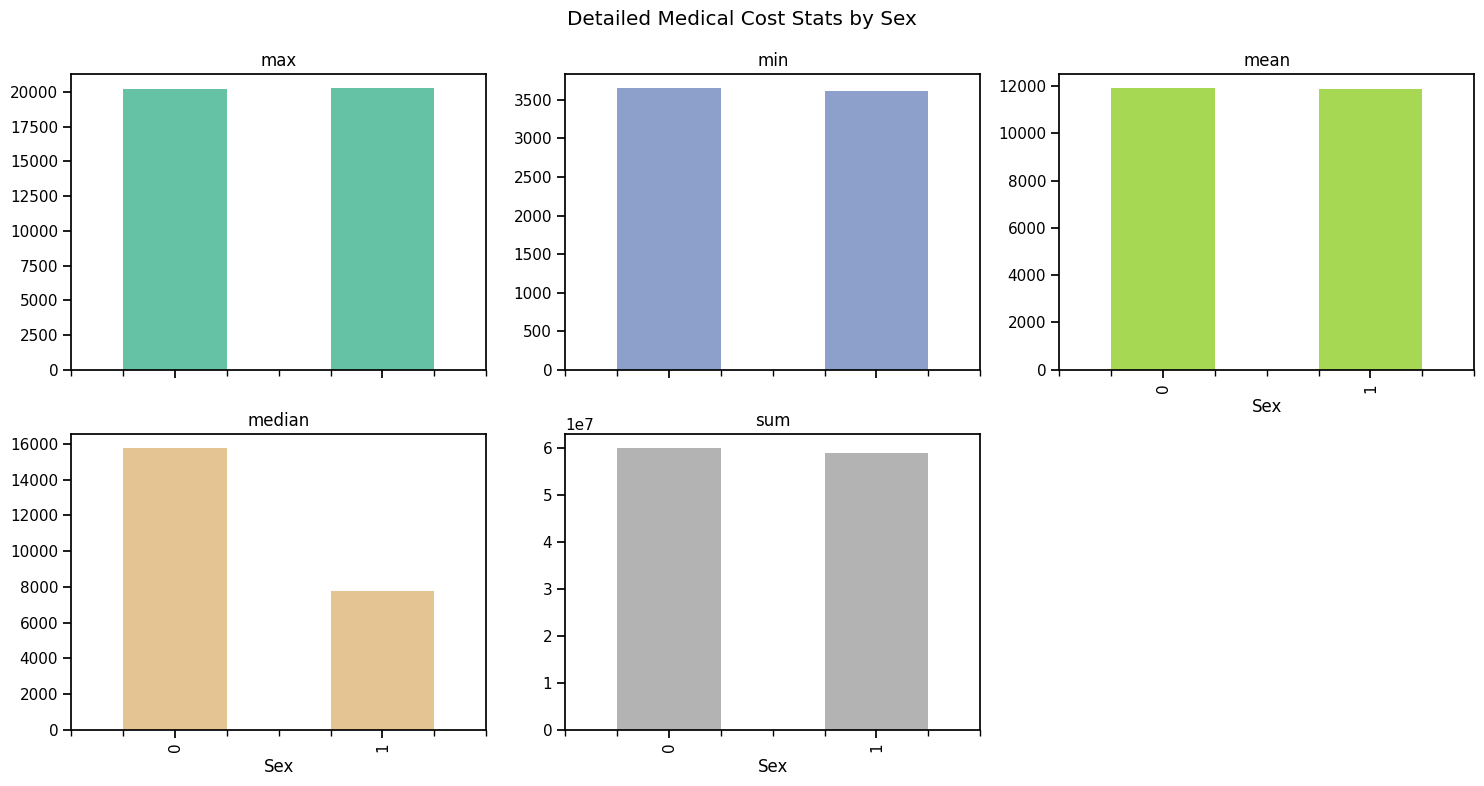

In [75]:
n_.plot(kind='bar', subplots=True, layout=(2,3), figsize=(15,8), legend=False, colormap='Set2', sharex=True)
plt.suptitle('Detailed Medical Cost Stats by Sex')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# 0 => Famale  , 1 => Male

# Number of female is high comparing to Male

In [76]:
df['Region'].value_counts()

# Northeast => 0 , Northwest => 1 , Southeast => 2 , Southwest => 3 

Region
3    2521
0    2514
1    2486
2    2479
Name: count, dtype: int64

In [82]:
# n_ = df.groupby('Smoker')['Medical_Cost'].agg(['max', 'min', 'mean', 'median', 'sum'])

# # Create subplot layout
# fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# fig.suptitle('Medical Cost Statistics by Smoker - Combined Visualization', fontsize=16, fontweight='bold')

# # Plot 1: Bar Plot (mean, median, sum)
# n_[['mean', 'median', 'sum']].plot(kind='bar', ax=axes[0,0], colormap='viridis')
# axes[0,0].set_title('Bar Plot: Mean, Median, Sum')
# axes[0,0].set_ylabel('Cost')
# axes[0,0].grid(axis='y', linestyle='--', alpha=0.7)
# axes[0,0].legend(title='Metric')

# # Plot 2: Line Plot (all stats)
# n_.plot(kind='line', ax=axes[0,1], marker='o', linestyle='--')
# axes[0,1].set_title('Line Plot: All Stats')
# axes[0,1].set_ylabel('Cost')
# axes[0,1].grid(True)

# # Plot 3: Heatmap
# sns.heatmap(n_, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5, ax=axes[1,0])
# axes[1,0].set_title('Heatmap: All Metrics')

# # Plot 4: Individual Bar Charts per Metric
# n_.plot(kind='bar', subplots=True, layout=(2,3), figsize=(10,6), ax=axes[1,1:], legend=False, colormap='Set2', sharex=True)
# # Fix the layout bug in subplot merge
# plt.delaxes(axes[1,1])  # remove unused subplot slot

# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

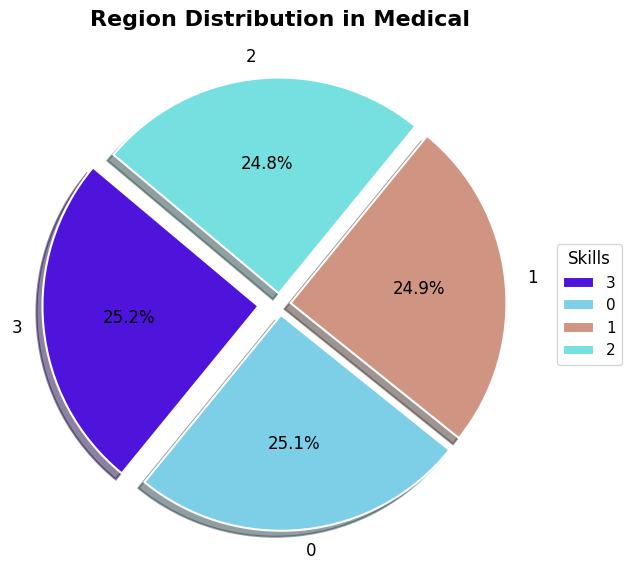

In [86]:
sizes,labels,colors ,explode = customized(df["Region"])
# Create Pie Chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# 🔷 Legend
plt.legend(wedges, labels, title="Skills", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 🔶 Title
plt.title("Region Distribution in Medical", fontsize=16, weight='bold')

# ⚪ Draw circle for donut effect (optional)
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

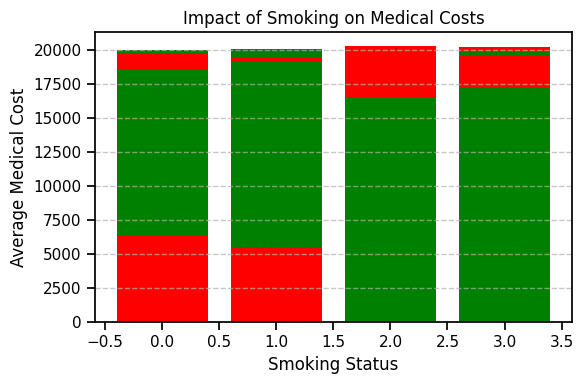

In [92]:
# plt.bar(df['Region'],df['Medical_Cost'])

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(df['Region'], df['Medical_Cost'], color=['red', 'green'])

# Labels and Title
plt.xlabel('Smoking Status')
plt.ylabel('Average Medical Cost')
plt.title('Impact of Smoking on Medical Costs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: xlabel='Region', ylabel='Medical_Cost'>

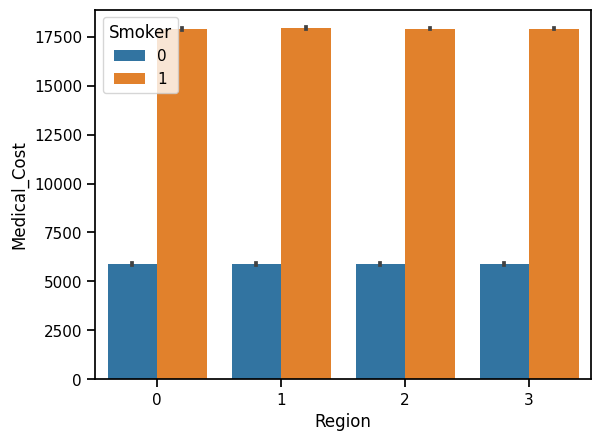

In [93]:
sns.barplot(x = df["Region"] , y =df['Medical_Cost'],hue=df['Smoker']) 

<Axes: xlabel='Region', ylabel='BMI'>

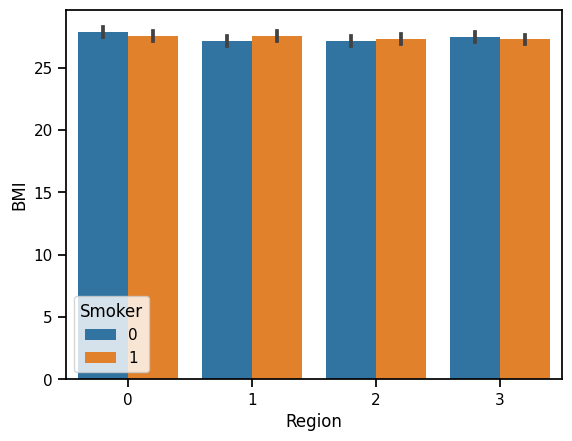

In [95]:
sns.barplot(x = df["Region"] , y =df['BMI'],hue=df['Smoker']) 

<Axes: xlabel='Region', ylabel='Medical_Cost'>

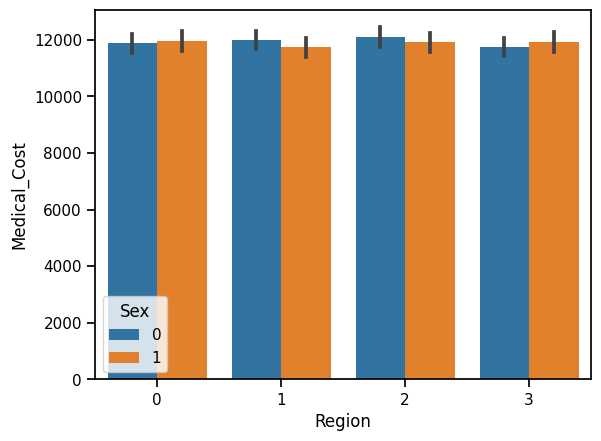

In [94]:
sns.barplot(x = df["Region"] , y =df['Medical_Cost'],hue=df['Sex']) 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

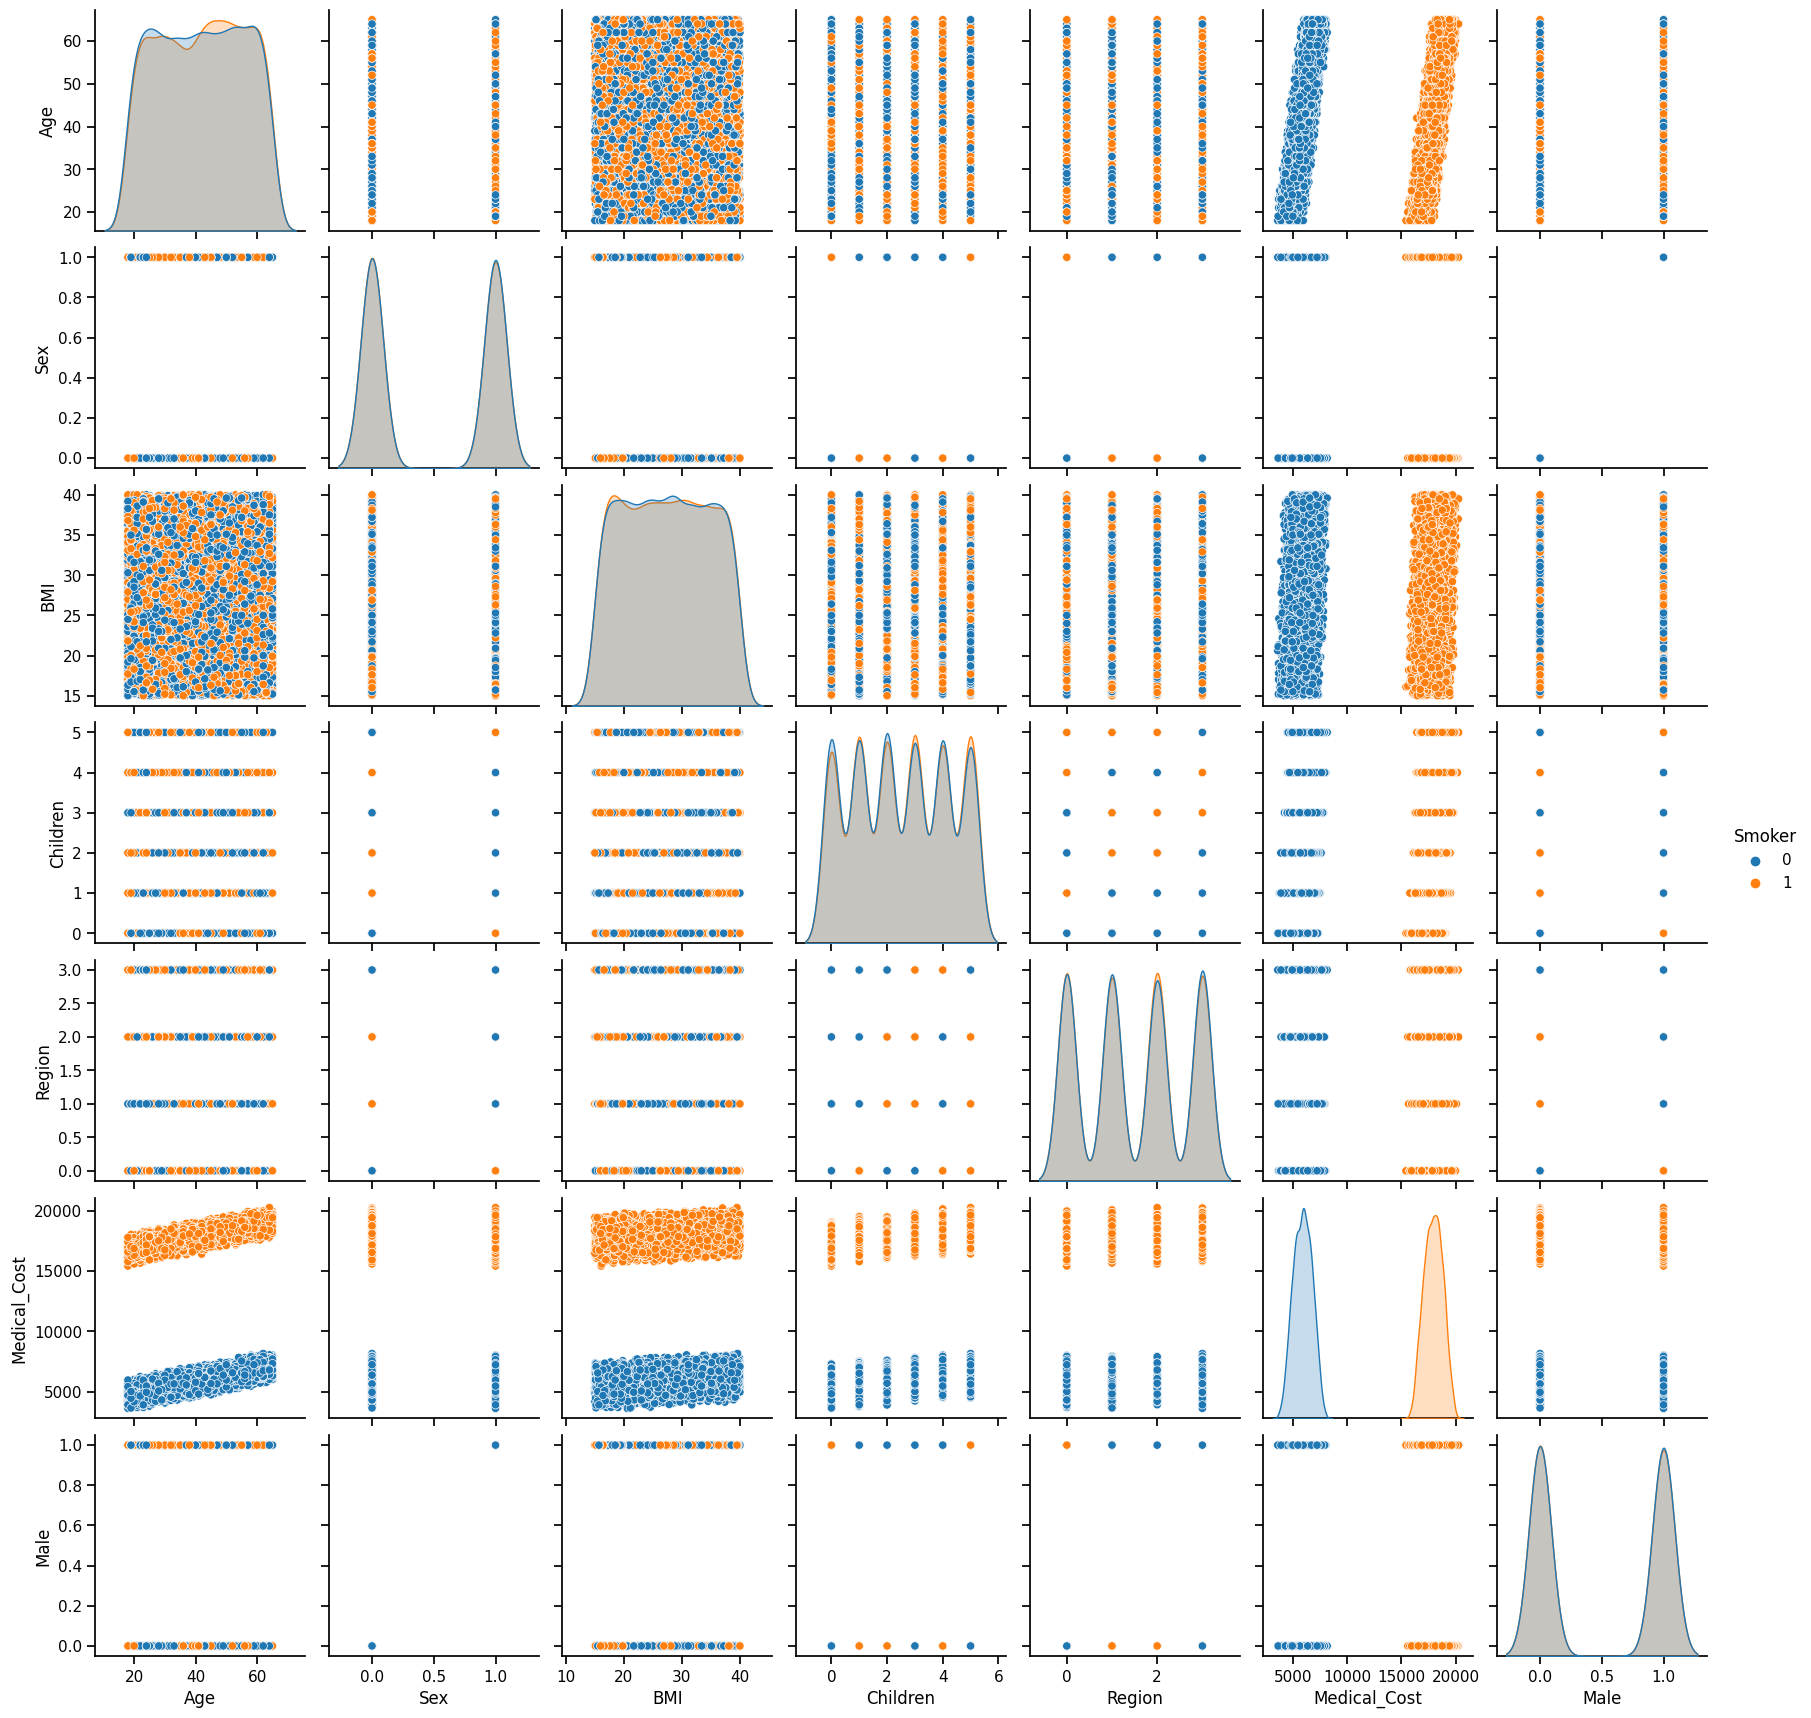

In [98]:
sns.pairplot(df,hue='Smoker')

<Axes: xlabel='Smoker', ylabel='Medical_Cost'>

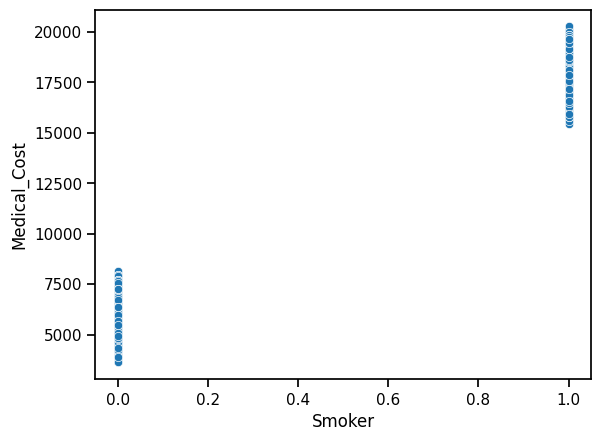

In [103]:
sns.scatterplot(x=df['Smoker'],y=df['Medical_Cost'])

In [79]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical_Cost,Male
0,58,1,15.6,2,1,1,17907.54,True
1,24,1,29.8,0,1,0,16312.64,True
2,50,1,29.0,5,0,1,6819.21,True
3,35,1,34.0,1,0,2,5247.87,True
4,31,0,17.6,3,1,2,17525.49,False
